# CAP5636 - HW2 Task 1
## Robert Forristall

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Read in training and test data
training_data = pd.read_csv('train.csv')
testing_data = pd.read_csv('test.csv')

# Data Visualization
This section is used to visual the data and gain insight on what features may be important/irrelevant, the type of each feature, and how much data is missing

In [2]:
# Print the number of coulums, their ids, the number of non-null elements, and the type for each feature in the training set
print(training_data.info())

# Print some mathematical values associated with the numerical variables
training_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
# Print the first 5 rows of the training set to further visualize the format of the data
training_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Checking options for Pclass feature to determine how many splits it can have
print (training_data["Pclass"].value_counts())

# Checking options for SibSp feature to determine how many splits it can have
print (training_data["SibSp"].value_counts())

# Checking options for Parch feature to determine how many splits it can have
print (training_data["Parch"].value_counts())

# Checking options for Cabin feature to determine how many splits it can have
print (training_data["Cabin"].value_counts())

# Checking options for Embarked feature for filling in the null values afterwards in the training set
print(training_data["Embarked"].value_counts())

3    491
1    216
2    184
Name: Pclass, dtype: int64
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64
B96 B98        4
G6             4
C23 C25 C27    4
F2             3
E101           3
              ..
B42            1
A14            1
D48            1
C90            1
F38            1
Name: Cabin, Length: 147, dtype: int64
S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [5]:
# Print the information on the testing data to look for any missing values
print(testing_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


# Preprocessing data

Now that the data has been visualized we can see a number of instances that need to be handled:

## Training Data:
- The age feature is missing over 100 values and needs to have those values substituted with something
    - Chose the mean to be the substitute for all null values in age
- The cabin feature is missing well over 50% of the data and would be hard to substitute null values since there are so few given values
    - Cabin will likely be dropped in feature selection
- The sex feature is currently set to 'male' and 'female' so mapping it to a boolean value would be prefered
    - male is set to 0, female is set to 1
- The Embarked feature is missing 2 values in the training data and should be substituted
    - These 2 values are substituted with the most commonly occuring value of S
    
## Testing data:
- The age feature is missing around 80 values and needs to have those values substituted with something
    - Chose the mean to be the substitute for all null values in age
- The cabin feature is missing well over 50% of the data and would be hard to substitute null values since there are so few given values
    - Cabin will likely be dropped in feature selection
- The sex feature is currently set to 'male' and 'female' so mapping it to a boolean value would be prefered
    - male is set to 0, female is set to 1
- the fare feature is missing one value and needs to have that value substituted with something
    - Chose the mean to be the substitute for the null value in fare

In [6]:
# Seperate labels from data
training_data_X = training_data.drop("Survived", axis='columns')
training_data_Y = training_data["Survived"]

# Check to make sure labels were seperated properly
# print(training_data_X.info())
# print(training_data_Y)

# Handle the missing age feature values
training_data_X["Age"] = training_data_X["Age"].fillna(training_data_X["Age"].mean())
testing_data["Age"] = testing_data["Age"].fillna(testing_data["Age"].mean())

# Cabin is ignored since it will be dropped due to the massive amount of missing data as well as having so many possible splits

# Handle the sex feature value to be 0 or 1 for easier understanding
training_data_X["Sex"] = training_data_X["Sex"].map({"male": 0, "female": 1})
testing_data["Sex"] = testing_data["Sex"].map({"male": 0, "female": 1})

# Handle the missing embarked feature values
training_data_X["Embarked"] = training_data_X["Embarked"].fillna(training_data_X["Embarked"][0])
training_data_X["Embarked"] = training_data_X["Embarked"].map({"S": 0, "C": 1, "Q": 2})
# Handle the missing fare feature value in test data
testing_data = testing_data["Fare"].fillna(testing_data["Fare"].mean())

# Feature Selection

## Included Features:
- Pclass
    - Pclass is included since it likely has a statistical relevance to the survival chance since higher priority passengers are likey to have been prioritized for survival over lower priority passengers
- Sex
    - Sex is included since it likely has a statistical relevance to the survival chance since women would likely be prioritized for survival over men
- Age
    - Age is included since it likely has a statistical relevance to the survival chance since younger passengers are likely to have been prioirtized over older passengers
- SibSp
    - SibSp is included since it likely has a statistical relevance to the survival chance since people with siblings or spouses on the ship could impact the person's survivability. Those with spouses or siblings might have been prioritized over those who are single/only childs
- Parch
    - Parch is included since it likely has a statistical relevance to the survival chance since being a parent and/or having many children could prioritize you over other non-parents/childless families for survival
- Fare
    - Fare is included since it likely has a statistical relevance to the survival chance since those who payed more are likely to have been prioirtized over those who payed less for survival
    - Note: The fare feature may not split well since it is a continuous value and may be excluded following further testing

## Excluded Features with reasoning:
- PassengerId
    - PassengerId is dropped since it has far too many splits and is likely overall irrelivant to the survival chance
- Name
    - Name is dropped since it has far too many splits and is likely overall irrelivant to the survival chance
    - Note: The name's many splits could be eliminated by simply considering the title given to the name which could provide a statistical signifigance for the survivial rate since revrands, priets, doctors, veterans, etc. could have been given priority over others but this was not considered for this implementation due to time constraints
- Ticket
    - Ticket is dropped since it has far too many splits and is likely overall irrelivant to the survival chance
- Cabin
    - Cabin is dropped since it has far too many splits and is likely overall irrelivant to the survival chance
    - Note: the cabin feature may be statistically relevant to the survival chance of passengers since those in cabins close to life boats could have been prioiritized due to proximity. Further iterations could look for a way to decrease the splits to make it more compatible with a decision tree such as splitting based on the first letter of the cabin since that would drastically decrease the number of splits needed for it. This was not done in this implementation due to time constraints

### Moved to Excluded after testing
- Embarked
    - Embarked was initally included but due to feature detection detecting minor importance it was removed

In [7]:
# Dropping excluded features from training data
training_data_X = training_data_X.drop(["PassengerId", "Name", "Ticket", "Cabin", "Embarked"], axis="columns")

# Checking features dropped properly
print(training_data_X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    int64  
 2   Age     891 non-null    float64
 3   SibSp   891 non-null    int64  
 4   Parch   891 non-null    int64  
 5   Fare    891 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 41.9 KB
None


# Create/Plot Decision Tree Model

Using the sklearn library and the graphviz library I will create a decision tree classifier, fit it to the training data, and plot the resulting tree

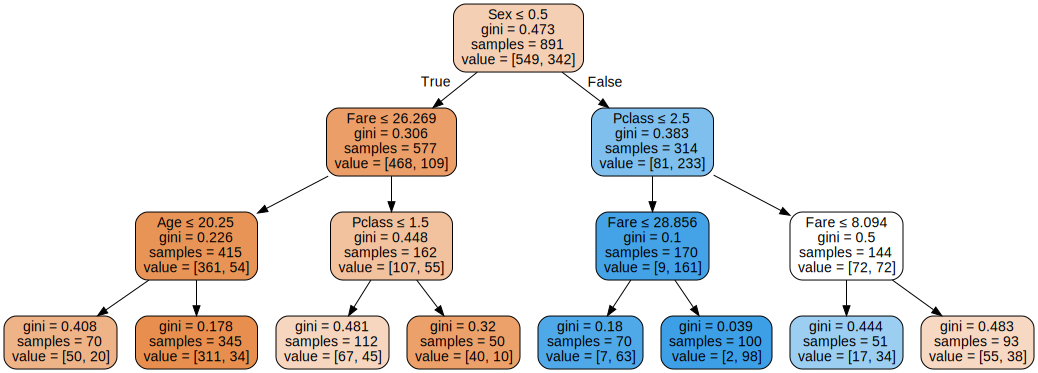

In [8]:
# Import sklearn.tree and graphviz
from sklearn import tree
import graphviz

# Get list of feature names
features = list(training_data_X.columns)

# Set up parameters for DecisionTreeClassifier for easier tweeking
dt_tree_params = {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 50, 'min_samples_split': 50}

# Build the decision tree model
dt_model = tree.DecisionTreeClassifier(**dt_tree_params)

# Fit the decision tree model to the training data
dt_model.fit(training_data_X, training_data_Y)

# Visualize/Plot the graph of the decision tree using graphviz
visualized_dt_tree = tree.export_graphviz(dt_model, out_file=None, filled=True, rounded=True, special_characters=True, feature_names = features)
dt_graph = graphviz.Source(visualized_dt_tree)
dt_graph

# Five-Fold Cross Validation for Decision Tree

Five Fold Cross:  [0.82681564 0.78651685 0.79775281 0.79775281 0.82022472]
Average of Five Fold Cross:  0.8058125666938671


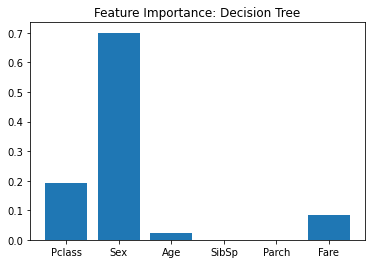

In [9]:
# Import cross_val_score from sklearn to perform five fold cross validation on decision tree
from sklearn.model_selection import cross_val_score

# Perform five fold cross validation and find average
five_fold_cross_dt = cross_val_score(dt_model, training_data_X, training_data_Y, cv=5)
print("Five Fold Cross: ", five_fold_cross_dt)
print("Average of Five Fold Cross: ", np.average(five_fold_cross_dt))

# For tweeking purposes find feature importance to possible adjust feature selection
dt_important_features = dt_model.feature_importances_
#print(dt_important_features)
plt.bar(features, dt_important_features)
plt.title("Feature Importance: Decision Tree")
plt.show()

# Create/Plot Random Forest Model

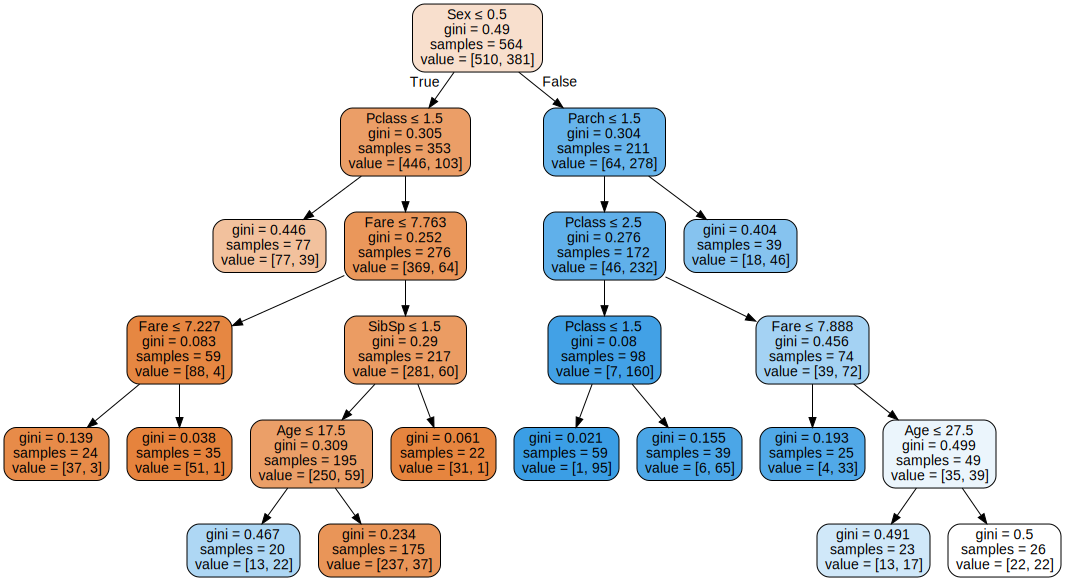

In [10]:
# Import RandomForestClassifier from sklearn
from sklearn.ensemble import RandomForestClassifier

# Set up parameters for RandomForestClassifier for easier tweeking
rf_tree_params = {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 20, 'min_samples_split': 20, 'n_estimators': 10}

# Build Random Forest Model
rf_model = RandomForestClassifier(**rf_tree_params)

# Fit Random Forest Model to training data
rf_model.fit(training_data_X, training_data_Y)

# Get first estimator from random forest for plot
estimator = rf_model.estimators_[0]

# Visualize/Plot the graph of the random forest using graphviz
visualized_rf_tree = tree.export_graphviz(estimator, out_file=None, filled=True, rounded=True, special_characters=True, feature_names = features)
rf_graph = graphviz.Source(visualized_rf_tree)
rf_graph

# Five Fold Cross Validation for Random Forest

Five Fold Cross:  [0.68156425 0.81460674 0.80337079 0.78089888 0.8258427 ]
Average of Five Fold Cross:  0.7812566693867302


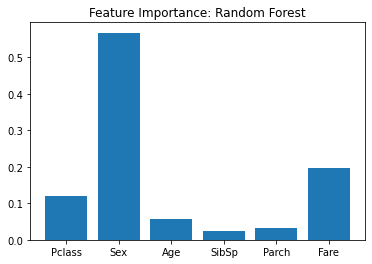

In [11]:
# Perform five fold cross validation and find average
five_fold_cross_rf = cross_val_score(rf_model, training_data_X, training_data_Y, cv=5)
print("Five Fold Cross: ", five_fold_cross_rf)
print("Average of Five Fold Cross: ", np.average(five_fold_cross_rf))

# For tweeking purposes find feature importance to possible adjust feature selection
rf_important_features = rf_model.feature_importances_
#print(rf_important_features)
plt.bar(features, rf_important_features)
plt.title("Feature Importance: Random Forest")
plt.show()

# Comparison/Analysis Between Decsion Tree and Random Forest

From the results of this program; the random forest classifier has the potential to be better than a decision tree classifier but a decision tree classifier seems to be more stable than the random forest classifier. When performing cross validations, each change in the decision tree's variables caused a change in the tree that was stable across multiple runs with the same variables. Random forest on the other hand has a range of values it can get from cross validation even when the variables are unchanged; sometimes it was greater than the decision tree's value but it has mostly been less than the decision tree's value.

More testing will have to be done to see what the true potential is for these two models but for reference the best average validation scores obtained during testing were:
- Decision Tree: 0.8058125666938671
- Random Forest: 0.8092021844203126